# `ALY6010: Probability Theory and Introductory Statistics`
#### Prepared by:
####         1)
####         2)
####         3)
####         4)
#### Presented to: Dr. Chinthaka Pathum Dinesh Herath Gedara
#### Date: March 12,2023

### Objective
##### The goal is to examine and visualize bank churn data to find patterns and variables that lead to customer churn in order to offer insights and suggestions for the bank's customer retention strategy that will help business cut down on losses.

### Variables Description:
##### RowNumber: A unique identifier for each record in the dataset.
##### CustomerId: A unique identifier for each customer in the bank.
##### Surname: The last name of the customer.
##### CreditScore: a number that represents a customer's creditworthiness or credit eligibility.
##### Geography: The dataset has three alternative values for the customer's country of residence(Spain, Germany and France)
##### Gender: the customer's gender, which may be either male or female.
##### Age: The age of the customer in years.
##### Tenure: The number of years that the customer has been a client of the bank.
##### Balance: The total amount of money that a client has in their bank account.
##### NumOfProducts: The amount of products a customer utilises or has with the bank.
##### HasCrCard: the presence or absence of the customer's credit card with the bank; a value of 1 denotes the presence of a credit card.
##### IsActiveMember: If the client is a current, active member of the bank.
##### EstimatedSalary: The estimated yearly salary of the customer.
##### Exited: A binary variable with a value of 1 indicating that the customer has churned or left the bank, and a value of 0 indicating that they have not churned.


### Importing Required Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
bank_churn = pd.read_csv("Churn Modeling.csv")

### Data Inspection

In [3]:
bank_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
bank_churn.shape

(10000, 14)

### Descriptive statistics of numerical columns in the Dataset

In [6]:
bank_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### cleaning the data if any inconsistencies

In [7]:
bank_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Summary:
1) customer_id is a unique assigned to customers. So, integers datatype is correctly specified. 2) branch_code again represents different branches, therefore it should be converted as "Category datatype. 3) Age and vintage are also numbers and hence we are okay wit them as integers. 4) Customer _networth_category is supposed to be an ordinal category, should be converted to "Category" datatype. 5) Churn 1 represents the churn and 0 represents not churn.However, there is no comparision between the two categories .This needs to be converted to each "Category" datatype.

##### As there are no missing values in any of the records across all columns, we can move forward with verifying if all the columns are required for data analysis.

### Removing unwanted columns

##### As the columns "RowNumber", "CustomerId", and "Surname" do not contribute to the data analysis, they are being dropped to enhance the efficiency of the analysis

In [9]:
bank_churn = bank_churn.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [10]:
bank_churn['Gender'] = bank_churn['Gender'].astype('category')
bank_churn['Geography'] = bank_churn['Geography'].astype('category')
bank_churn['HasCrCard'] = bank_churn['HasCrCard'].astype('category')
bank_churn['IsActiveMember'] = bank_churn['IsActiveMember'].astype('category')
bank_churn['Exited'] = bank_churn['Exited'].astype('category')

### Finding the outliers

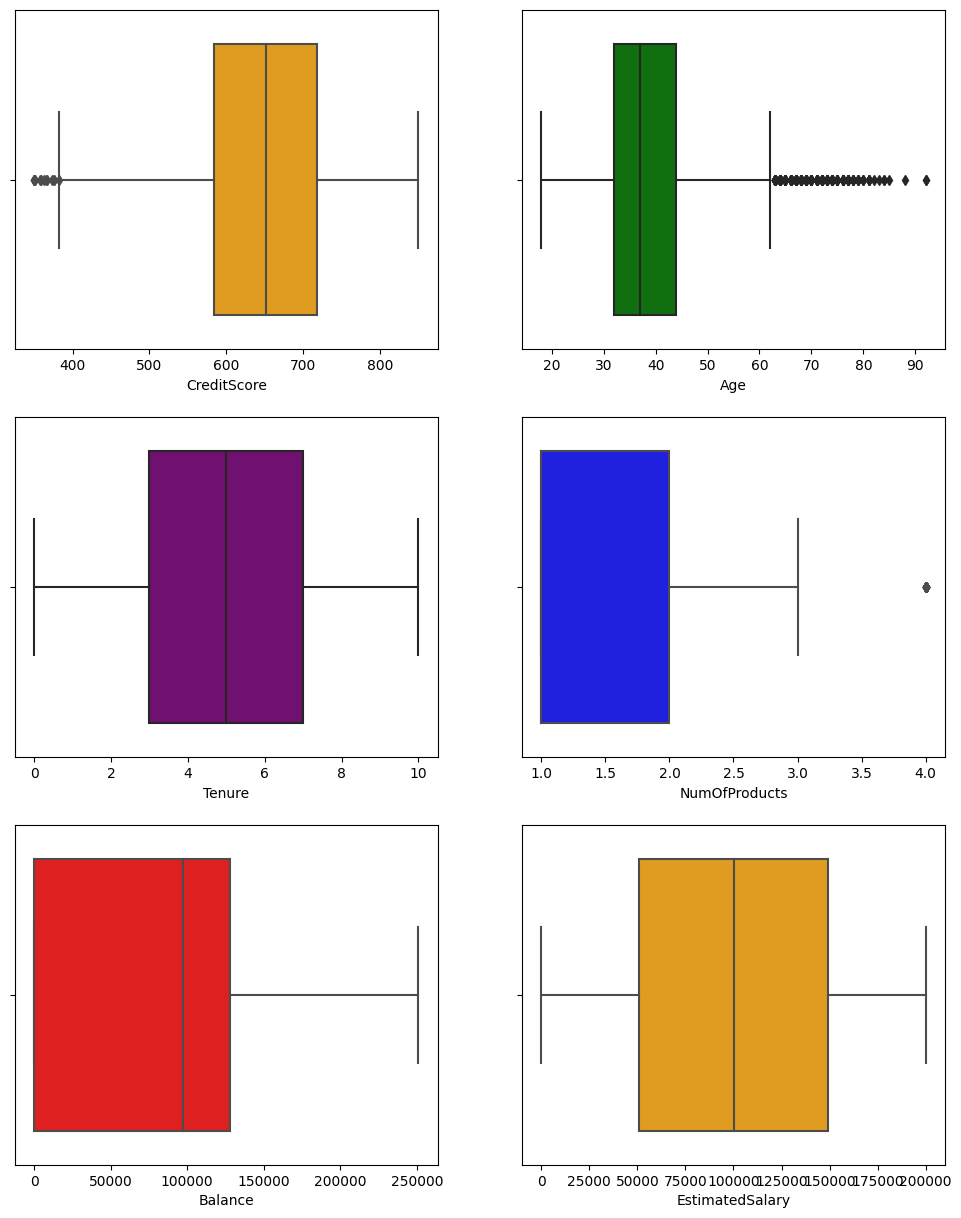

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

sns.boxplot(ax=axes[0,0], x='CreditScore', data=bank_churn, color='orange')
sns.boxplot(ax=axes[0,1], x='Age', data=bank_churn, color='Green')
sns.boxplot(ax=axes[1,0], x='Tenure', data=bank_churn, color='Purple')
sns.boxplot(ax=axes[1,1], x='NumOfProducts', data=bank_churn, color='blue')
sns.boxplot(ax=axes[2,0], x='Balance', data=bank_churn, color='red')
sns.boxplot(ax=axes[2,1], x='EstimatedSalary', data=bank_churn, color='')


plt.show()

### Inferences

##### > Customers with a low credit score may have a history of defaults, making the score a valid metric.
##### > It is reasonable to assume that the bank has clients over the age of 60.
##### > Allowing for outliers in cases where a customer has opted for all products may be necessary to capture valid observations. However, it is worth noting that these observations are rare.

### Univariative Analysis

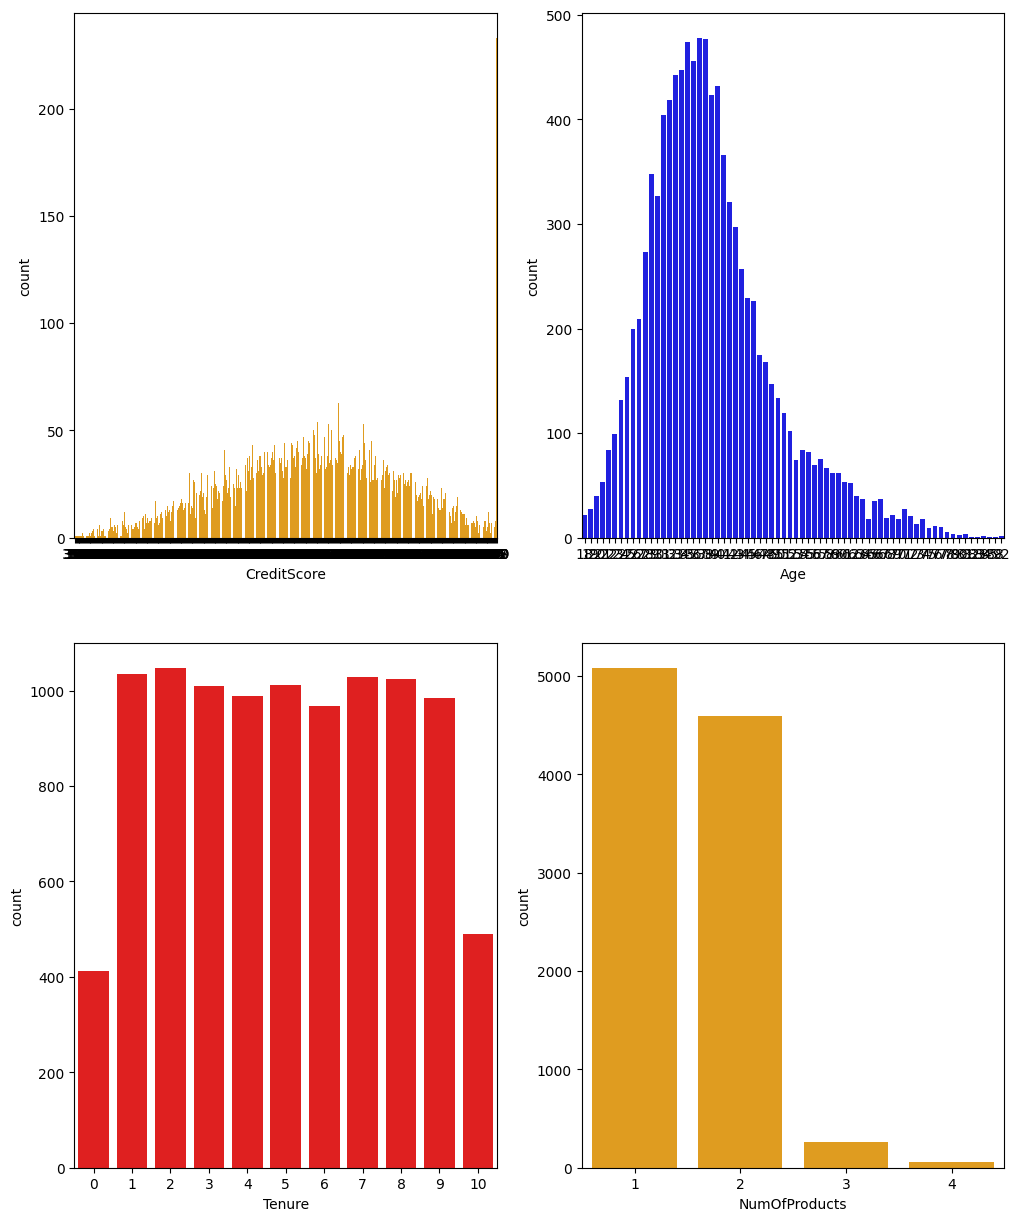

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 15))

sns.countplot(ax=axes[0,0], x='CreditScore', data=bank_churn, color='orange')
sns.countplot(ax=axes[0,1], x='Age', data=bank_churn, color='Blue')
sns.countplot(ax=axes[1,0], x='Tenure', data=bank_churn, color='red')
sns.countplot(ax=axes[1,1], x='NumOfProducts', data=bank_churn, color='orange')

plt.show()

### Checking the skewness

In [16]:
skew_credit_score = stats.skew(bank_churn['CreditScore'])
skew_age = stats.skew(bank_churn['Age'])

print("The skewness value of credit score is:", skew_credit_score)
print("The skewness value of Age is:", skew_age)


The skewness value of Height is: -0.07159586676212397
The skewness value of Age is: 1.0111685586628079


### Inferences
##### > skewness value of credit score is quite close to zero, which means that the distribution is nearly symmetric but slightly left-skewed.
##### > Age's skewness score is positive, indicating a moderate right-skewed distribution where there are more people with lower Age values than higher values.
##### > The majority of customers stayed with the bank for a period between 1 and 9 years.
##### > The bank's customers primarily preferred to purchase 1 or 2 products, with only a small number of customers opting for 3 or 4 products.

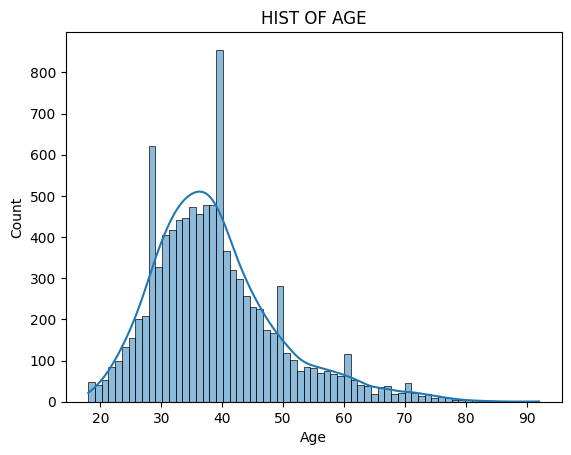

In [49]:
# ploting hist plot for age 
sns.histplot(x='Age', data=bank_churn,kde=True)
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('HIST OF AGE')
plt.show()

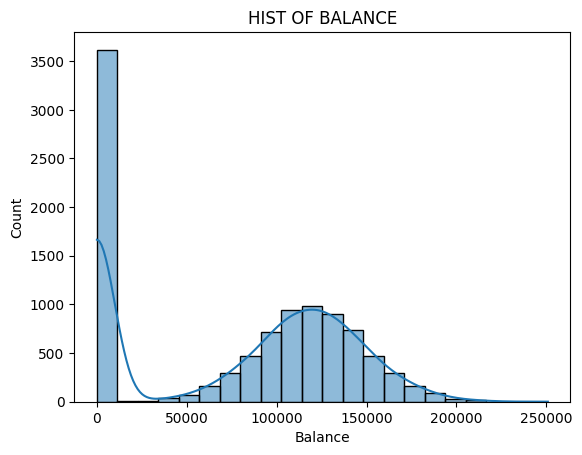

In [50]:
# Ploting hist plot for balance 
sns.histplot(x='Balance', data=bank_churn,kde=True)
plt.ylabel('Count')
plt.xlabel('Balance')
plt.title('HIST OF BALANCE')
plt.show()


### Understanding Categorical variables

In [43]:
bank_churn['NumOfProducts'] = bank_churn['NumOfProducts'].astype('category')

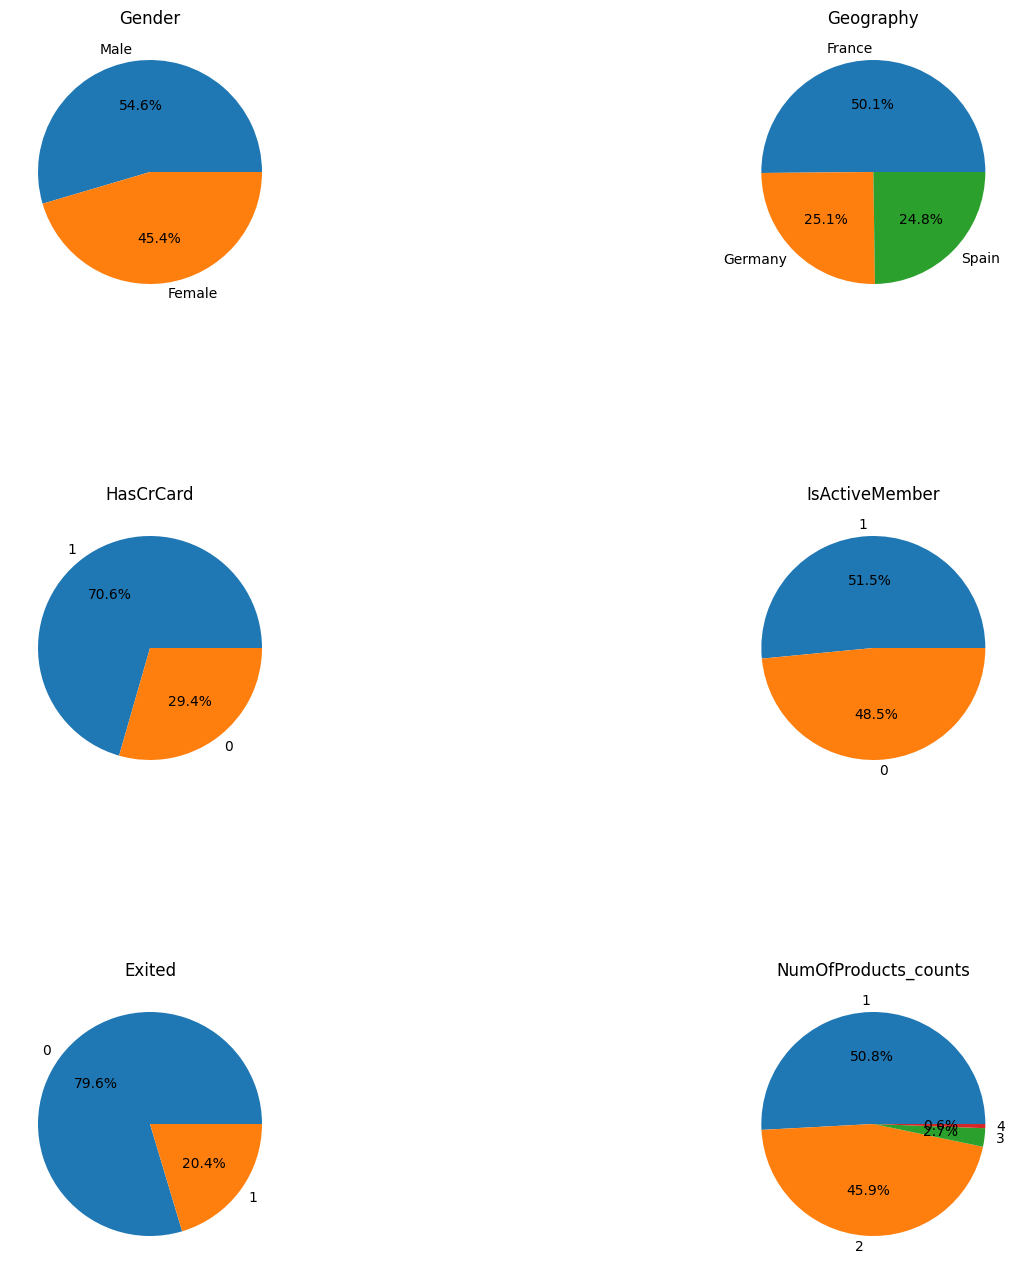

In [28]:
# count the number of occurrences for each categorical variable
gender_counts = bank_churn['Gender'].value_counts()
geography_counts = bank_churn['Geography'].value_counts()
hascrcard_counts = bank_churn['HasCrCard'].value_counts()
isactivemember_counts = bank_churn['IsActiveMember'].value_counts()
exited_counts = bank_churn['Exited'].value_counts()
NumOfProducts_counts = bank_churn['NumOfProducts'].value_counts()


# create a list of counts and labels for each categorical variable
counts_list = [gender_counts, geography_counts, hascrcard_counts, isactivemember_counts, exited_counts, NumOfProducts_counts]
labels_list = ['Gender', 'Geography', 'HasCrCard', 'IsActiveMember', 'Exited', 'NumOfProducts_counts']

# create a 2x3 subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

# create pie charts for each categorical variable
axes[0, 0].pie(counts_list[0], labels=counts_list[0].index.tolist(), autopct='%1.1f%%')
axes[0, 0].set_title(labels_list[0])

axes[0, 1].pie(counts_list[1], labels=counts_list[1].index.tolist(), autopct='%1.1f%%')
axes[0, 1].set_title(labels_list[1])

axes[1, 0].pie(counts_list[2], labels=counts_list[2].index.tolist(), autopct='%1.1f%%')
axes[1, 0].set_title(labels_list[2])

axes[1, 1].pie(counts_list[3], labels=counts_list[3].index.tolist(), autopct='%1.1f%%')
axes[1, 1].set_title(labels_list[3])

axes[2, 0].pie(counts_list[4], labels=counts_list[4].index.tolist(), autopct='%1.1f%%')
axes[2, 0].set_title(labels_list[4])

axes[2, 1].pie(counts_list[5], labels=counts_list[5].index.tolist(), autopct='%1.1f%%')
axes[2, 1].set_title(labels_list[5])


plt.subplots_adjust(wspace=0.4, hspace=0.7)

# show the pie charts
plt.show()

### Inferences
##### > The proportion of male clients is slightly higher than that of female customers.
##### > The vast majority of customers are from France, while nearly equally as many are from Germany and Spain.
##### > Customers that use credit cards make about 70% of the total.
##### > the percentage of active clients is about 52%.
##### > Around 21% of the bank's customers left.


### Variable of Interest
##### The "Exited" variable in the dataset, which denotes whether a customer has terminated their bank account, is the variable of interest. The bank can enhance its overall performance and gain insights into customer retention by analysing this characteristic.

In [65]:
bank_churn['HasCrCard'] = bank_churn['HasCrCard'].astype(int)
bank_churn['Exited'] = bank_churn['Exited'].astype(int)
bank_churn['NumOfProducts'] = bank_churn['NumOfProducts'].astype('int')

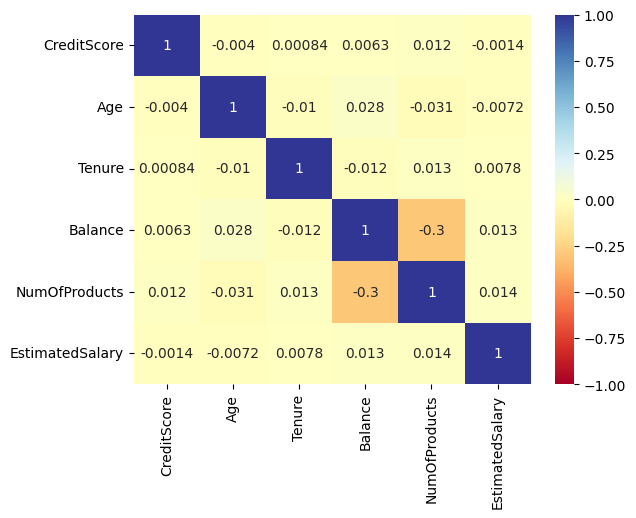

In [63]:
sns.heatmap(bank_churn.corr(),annot=True,cmap="RdYlBu",vmin=-1)
plt.show()

##### Only age and balance has a considerable correlation with exited variable

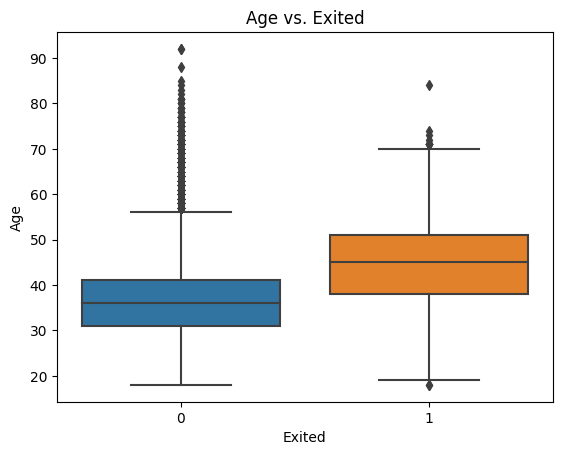

In [63]:
sns.boxplot(x='Exited', y='Age', data=bank_churn)
plt.title('Age vs. Exited')
plt.show()

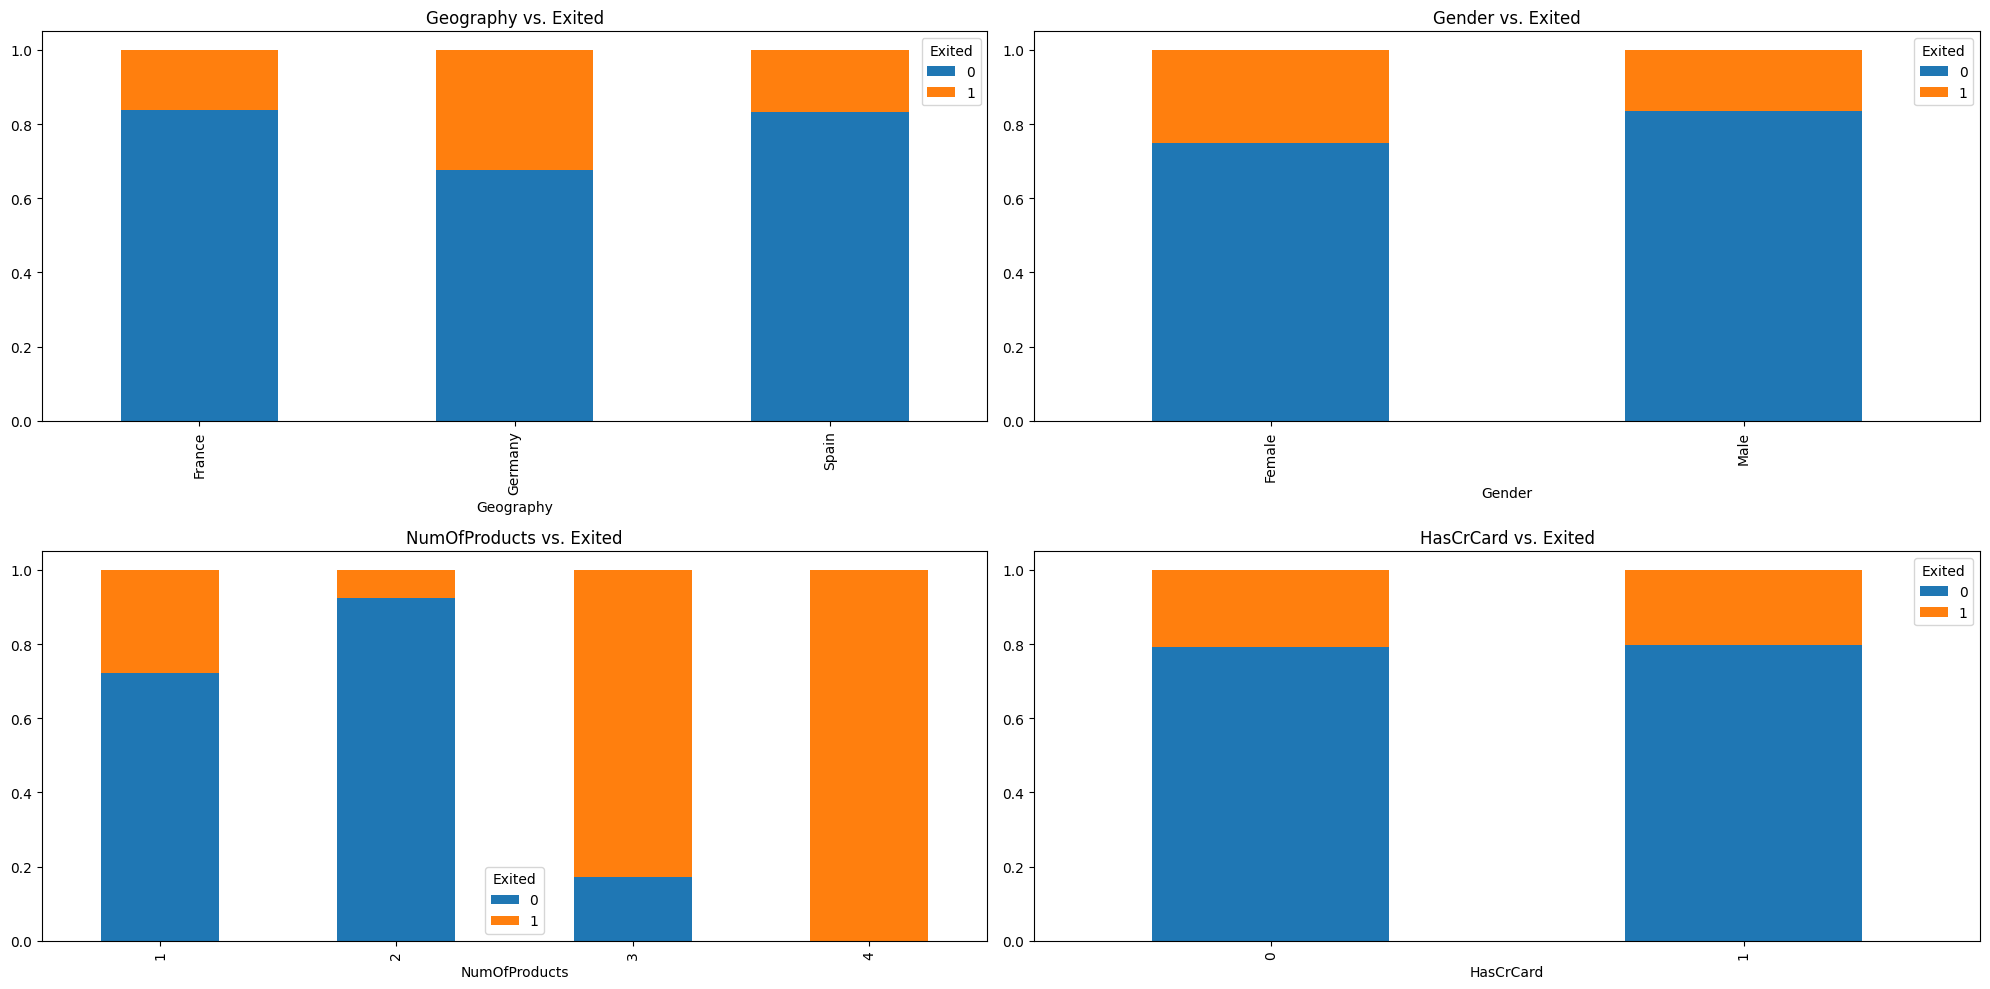

In [69]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))

# Geography vs. Exited
pd.crosstab(bank_churn['Geography'], bank_churn['Exited'], normalize='index').plot(kind='bar', stacked=True, ax=axs[0][0])
axs[0][0].set_title('Geography vs. Exited')

# Gender vs. Exited
pd.crosstab(bank_churn['Gender'], bank_churn['Exited'], normalize='index').plot(kind='bar', stacked=True, ax=axs[0][1])
axs[0][1].set_title('Gender vs. Exited')

# NumOfProducts vs. Exited
pd.crosstab(bank_churn['NumOfProducts'], bank_churn['Exited'], normalize='index').plot(kind='bar', stacked=True, ax=axs[1][0])
axs[1][0].set_title('NumOfProducts vs. Exited')

# HasCrCard vs. Exited
pd.crosstab(bank_churn['HasCrCard'], bank_churn['Exited'], normalize='index').plot(kind='bar', stacked=True, ax=axs[1][1])
axs[1][1].set_title('HasCrCard vs. Exited')


# Adjust the layout and spacing of the subplots
plt.tight_layout()

# Show the plot
plt.show()

##### >Based on our analysis, it has been observed that customers who have purchased three or four products have a higher probability of churning. Furthermore, inactive customers also exhibit a greater likelihood of churning. 

##### > the plot indicates that Germany has the highest exit rate among the countries in our dataset. Additionally, our findings reveal that females tend to have a higher exit rate compared to males

#####  >These insights are essential for our understanding of the factors that contribute to customer churn and can aid in the development of effective strategies to mitigate churn rates.

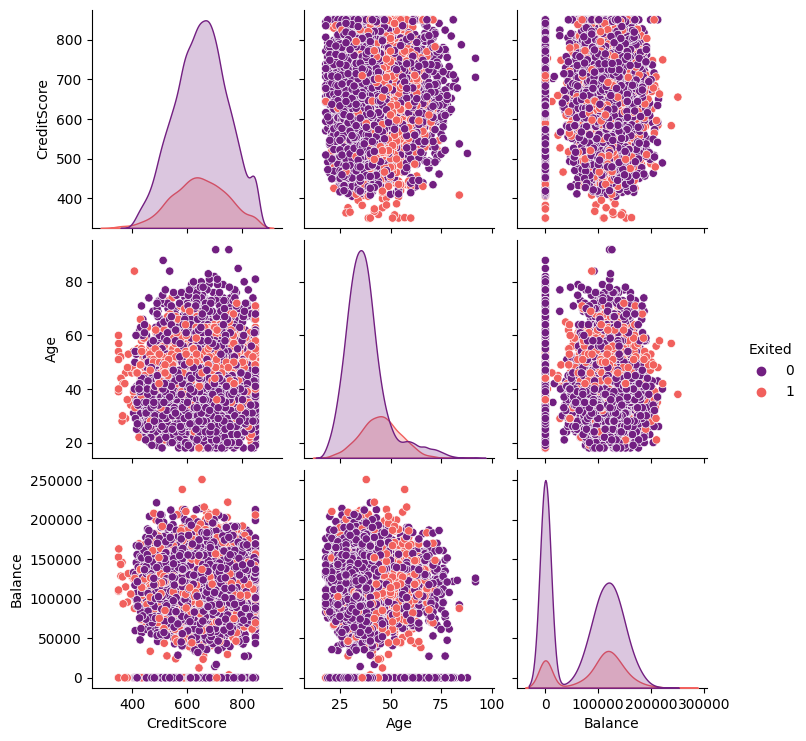

In [61]:
sns.pairplot(bank_churn,vars = ["CreditScore", "Age","Balance"],hue='Exited',palette='magma')
plt.show()

## https://python-charts.com/correlation/pairs-plot-seaborn/

# sub set of data 

In [52]:
# Creating a sub data 
Sub_set= bank_churn.drop(['Age','Geography','EstimatedSalary','Tenure','IsActiveMember'], axis=1)

In [53]:
Sub_set


,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,Exited
0,619,Female,0.00,1,1,1
1,608,Female,83807.86,1,0,0
2,502,Female,159660.80,3,1,1
3,699,Female,0.00,2,0,0
4,850,Female,125510.82,1,1,0
...,...,...,...,...,...,...
9995,771,Male,0.00,2,1,0
9996,516,Male,57369.61,1,1,0
9997,709,Female,0.00,1,0,1
9998,772,Male,75075.31,2,1,1


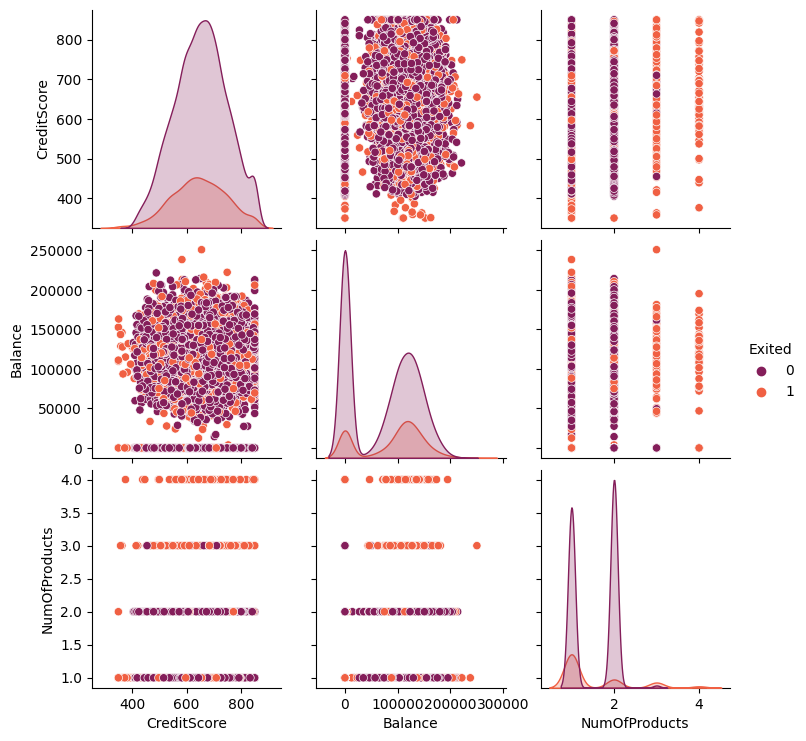

In [57]:
sns.pairplot(Sub_set,hue='Exited',palette='rocket')
plt.show()

##### It has been observed that there is a correlation between credit score and balance. These findings can provide valuable insights into the relationship between these two variables

##### Our analysis further reveals that there exists a correlation between the number of products, credit score, and balance. Specifically, as the number of products purchased increases, along with higher balance and credit score, there is an increased likelihood of customer churn. 

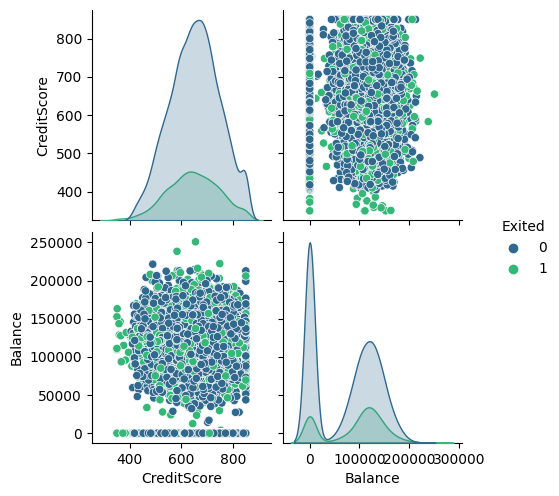

In [59]:
# plot scatter plot only for credit score and balance
sns.pairplot(Sub_set,vars = ["CreditScore","Balance"],hue='Exited',palette='viridis')
plt.show()

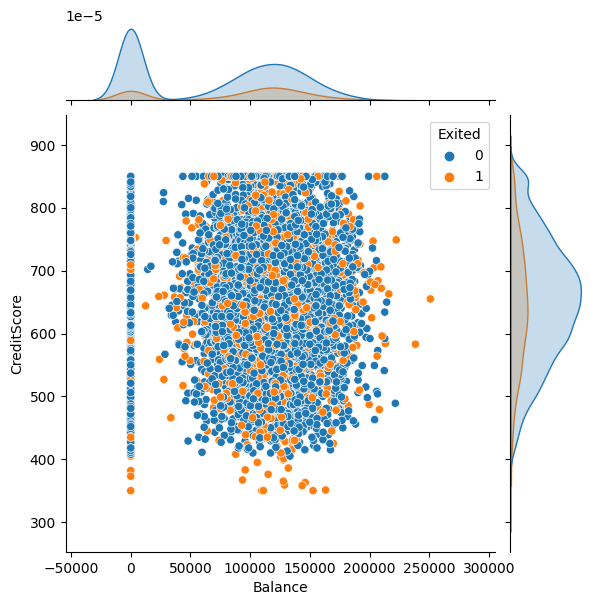

In [38]:
# Joint plot for Balance and CreditScore
sns.jointplot(x='Balance',y='CreditScore', data=bank_churn,hue='Exited')
plt.xlabel('Balance')
plt.ylabel('CreditScore')

plt.show()

#### Inference
##### > The above joint plot shows that lower the credit score and lower the balance the higher the rate of exit  